# Quantum Computing
***

### History and Overview

Computing has come a long way since the invention of the abacus that some consider the first computer. In the last 100 years the rate of evolution of technology has launched mankind into a new age. In 1965, Gordon Moore said that the number of transistors in a circuit would double every two years. This still holds true if you take it as meaning expenetial improvement rather than specific parameters like transistors.

The smallest processor ever built has been 3nm but there are talks of a 1nm on coming in the near future. These tiny spaces are approaching the atom, which is theoretically the limit.
A computer in simple terms, performs an extremely large amount of very basic operations. Each one of them take barely any power to perform and don't mean much by themselves but when there are so many they can be used to work together and produce everything we use computers for now.
Transistors are like an on or off switch that tells the computer if a bit is 0 or 1, on for 1 and off for 0. Multiple switches can form logic gates that perform different operations. From there you can use and combination or logic gates to create the programs we have today. 
To get these even faster, and get past the increasingly difficulty of creating smaller and smaller processors. Quantum computing was invented.

Computers that perform quantum computations are called quantum computers.
These can perform quantum mechanics operations like superposition, interference and entaglement. The current ones are't developed enough to compete with classical computers in everyday life but Google has said that it's quantum computer is roughly 158 million times faster than a supercomputer

### What is Quantum Computing?

Quantum computers use qubits instead of normal bits, these can also be set to either 0 or 1 but instead of being in either state, qubits can be in either position unless it is observed and has to decide on its value. This is called **superposition**.

4 normal bits can give you 16 different combinations of 1's and 0's.

4 Qubits in superposition can be every of the 16 combinations at the same time if unobserved.

This allows qubits to give a lot more information.
**Entaglement** also allows even more powerful calculation. Qubits can have a connection with another qubit that allows it to instantly make the other qubit decide on a value when itself decides on a value.

Quantum computers have their own logic gate as well called ***Quantum Gates***.
These Gates manipulate a series of superpositions to change the probability of what they will change to so they can predict what they will land on. This lets you get the answer to multiple operations at the same time.

### Classical Computing vs. Quantum computing

While a lot faster at certain computation, it is hard to apply quantum computers to everyday problems right now because of how little is known about it. Both types of computers have there own strengths and differences to here is a few of the key areas where they do differ.

**Classical Computers**
1. Data breaks down in its smallest for to just multiple operations of on or off/1 or 0. These are done with transitors with each transitor being 1 or 0.

2. Power with qubits increases exponetially, with just 20 qubits you can have over a million different values at once.

3. While very fast, the quantum computer has a high error rate and needs to be kept very cold to run. This makes them difficult to commercialise.

4. Quantum computers are currently seen as well suited for simulations and data analysis.

**Quantum Computers**
1. Instead of normal bits, quantum computers use qubits that can represent both states 0 or 1 at once. Combined with Entaglement and Quantum Gates. This allows for much faster computation.

2. The power increase for classical computers is directly related to the amount of transistors so it is a 1: ratio with power to transistors.

3. These computers in comparison have a low error rate and can perform at room temperature easily. This makes them a lot more comsumer friendly to adopt.

4. The amount of useful applications is a lot more open for classical computers. They tend to excel in every place that a quantum computer can't and vice versa for the time being.

# Deutsch's Algorithm
***

Deutsch's algorithm was first introduced in 1992 by David Deutsch. It was one of the first algorithms to show how much faster quantum computers where in comparison to classical ones. It was purposely design to show the speed of quantum computers over classical.

### The problem 

In the problem you are given a black box quantum computer called oracle that has the function below.

This function takes an *n* number of bits and outputs wither a 0 or 1 for each bit. The function is promised to be either constant or balanced. Meaning all inputs are either 0 or 1 for constant, or they are half and half with 0 and 1. The problem then asks to prove if $f$ is constant or balanced.

### Deutsch's Algorithm with Qiskit

In [1]:
# Qiskit itself
import qiskit

# Aer simulator.
import qiskit.providers.aer as aer

# Diagrams.
import matplotlib.pyplot as plt

# Random numbers.
import random

# Change pyplot style.
plt.style.use('ggplot')

### Constant Zero

In [2]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [3]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [4]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [5]:
# Apply a Hadamard gate to first qubit.
circuit.h(0)

In [6]:
# Apply a Hadamard gate to second qubit.
circuit.h(1)

In [7]:
# Identity gate.
circuit.i(1)

In [8]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [9]:
# Measure the first qubit.
circuit.measure(0, 0)

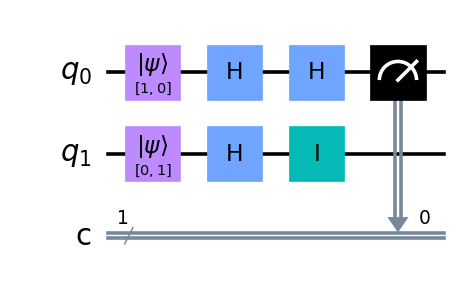

In [10]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [11]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [12]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [13]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [14]:
# Get the results.
results = job.result()

In [15]:
# Show the result counts.
counts = results.get_counts()
counts

{'0': 1000}

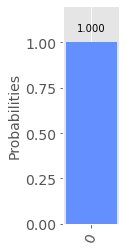

In [16]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Constant One

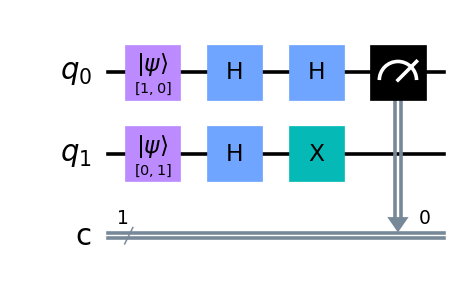

In [17]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# X gate.
circuit.x(1)

# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

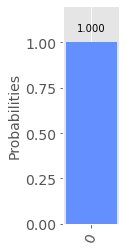

In [18]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Balanced - $f$(0) = 0,$f$(1) = 1

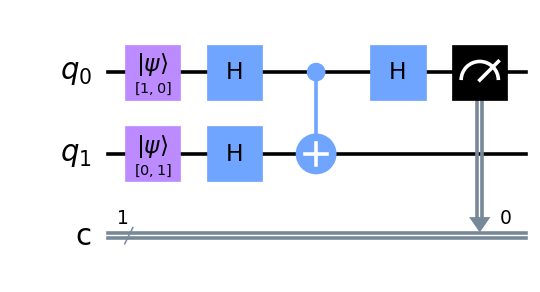

In [19]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# CNOT gate.
circuit.cnot(0, 1)

# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

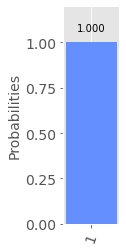

In [20]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Balanced: $f$(0) = 1,$f$(1) = 0

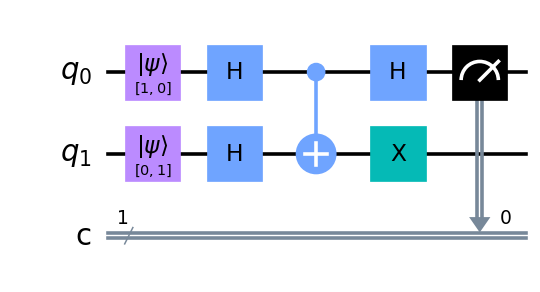

In [21]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# CNOT gate.
circuit.cnot(0, 1)

# Apply x to second qubit.
circuit.x(1)

# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

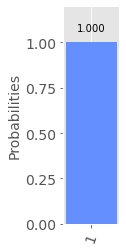

In [22]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))